## Example of generating a equilibrium from GEQDSK ##
- Visit https://pwl.home.ipp.mpg.de/NLED_AUG/data.html and download the geqdsk file https://pwl.home.ipp.mpg.de/NLED_AUG/g031213.00003 to ```examples``` directory

- Download and install FreeQDSK https://github.com/freegs-plasma/FreeQDSK

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gysmc import GEQDSKMagnetConfig
from gysmc import GYSMagnetConfig

### Read the GEQDSK file and set up the coordinates ###
One will need to decide

- To use ```theta``` or ```thetastar``` (straight-field-line angle) 

- COCOs number of the GEQDSK (5 for AUG, only support 2 and 5 currently)

- The ```psi``` value of the computational boundary and the corresponding radial coordinate ```rmax``` for it (should be the same as GYSELA ```rmax```).

In [6]:
eqdskmc = GEQDSKMagnetConfig('./g031213.00003', thetastar=False, cocos=5, psinorm_max=0.95, rmax=1.2)

Initialising GEQDSKMagnetConfig from file: ./g031213.00003
cocos convention set to: 5
INFO: cocos = 5/15, (R,phi,Z), (r,phi,theta)
INFO: Using geometric theta coordinate
INFO: Optimized magnetic axis location: R_axis = 1.665997, Z_axis = 0.065795, Psi_axis = -0.241128
INFO: Original magnetic axis location: R_axis = 1.666000, Z_axis = 0.065803, Psi_axis = -0.241127
INFO: Computational boundary at r=1.2000: s_max=0.9747, psinorm_max=0.9500
INFO: Plasma boundary at r=1.0: s(r=1.0)=0.8122, psinorm(r=1.0)=0.6597
INFO: Geometry in original unit: R_geo = 1.6338, a_geo(at r=1) = 0.3774, Aspect ratio = 4.3295
INFO: Magnetic field in original unit: Bvac_geocentre = 2.2296, B_axis = 2.2081
INFO: Psi1: in original unit psi1 = 0.1595, normalised to Bvac0*a_geo^2 psi1_norm = 0.5023
INFO: B is normalised to Bvac0=2.2296 at Rgeo=1.6338, length to a_geo=0.3774


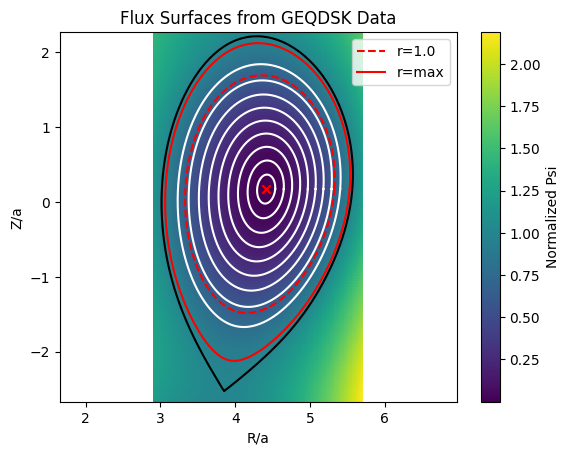

In [7]:
eqdskmc.plot_flux_surfaces(normalised_units=True)

### Write to GYSELA magnet_config.h5 ###
```Nr```, ```Ntheta```, ```minor_radius```, ```rmin```, ```rmax```, ```skiphole``` should match that of a GYSELA input file 

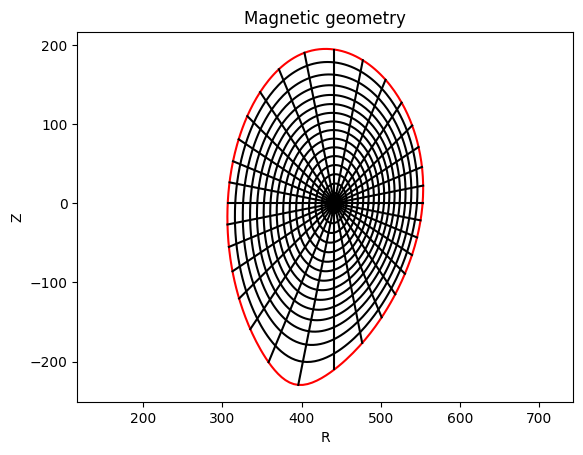

In [11]:
augconfig = GYSMagnetConfig(eqdskmc, Nr=127, Ntheta=256, minor_radius=100, rmax=1.2, rmin=0.0, skiphole=True)
augconfig.plot_geometry()
augconfig.to_hdf5('g031213.00003_AUG_theta256.h5')

### How to use the generated hdf5 ###

- Copy it to ```gysela``` folder under ```wk/profiles```.

- Set ```magnet_strategy = "EXTERNAL"``` in your ```EQUIL``` namelist.

- Specify the path to the hdf5 file such as ```magnet_config_filename = profiles/magnet_config.h5``` in the ```Variables for radial profile input files``` section.